In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
import pandas as pd


print("Loading dataset...")
df = pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=False)
print(f"Original shape: {df.shape}")

Loading dataset...
Original shape: (2260701, 151)


In [56]:
missing_values = df.isnull().sum()
print(missing_values)

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64


In [57]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [58]:

df.drop_duplicates

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.drop_duplicates of                                                        id  member_id  \
0                                                68407277        NaN   
1                                                68355089        NaN   
2                                                68341763        NaN   
3                                                66310712        NaN   
4                                                68476807        NaN   
...                                                   ...        ...   
2260696                                          88985880        NaN   
2260697                                          88224441        NaN   
2260698                                          88215728        NaN   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           3600.0

In [59]:
df.shape

(2260701, 151)

In [60]:
# Calculate missing value percentages
missing_percent = df.isnull().mean()

# Filter columns with missing percentage > 0.3 (30%)
cols_to_drop = missing_percent[missing_percent > 0.3].index

# Drop them from the DataFrame
df_cleaned = df.drop(columns=cols_to_drop)

print(f"Removed {len(cols_to_drop)} columns. New shape: {df_cleaned.shape}")

Removed 58 columns. New shape: (2260701, 93)


In [61]:
df = df_cleaned.copy()
# Missing values
print("\nMissing values (count per column):")
print(df.isnull().sum())

# Duplicate records
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Unique values per column (useful for categorical features)
print("\nUnique values per column:")
print(df.nunique())


Missing values (count per column):
id                                0
loan_amnt                        33
funded_amnt                      33
funded_amnt_inv                  33
term                             33
                              ...  
total_bc_limit                50063
total_il_high_credit_limit    70309
hardship_flag                    33
disbursement_method              33
debt_settlement_flag             33
Length: 93, dtype: int64

Number of duplicate rows: 0

Unique values per column:
id                            2260701
loan_amnt                        1572
funded_amnt                      1572
funded_amnt_inv                 10057
term                                2
                               ...   
total_bc_limit                  20309
total_il_high_credit_limit     194137
hardship_flag                       2
disbursement_method                 2
debt_settlement_flag                2
Length: 93, dtype: int64


In [62]:
important_columns = [
    # Numerical
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
    'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 
    'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
    'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 
    'collections_12_mths_ex_med', 'mort_acc', 'pub_rec_bankruptcies',
    # Categorical
    'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 
    'verification_status', 'purpose', 'loan_status', 'application_type', 'initial_list_status'
]

# Select only these columns
df = df[important_columns].copy()

print(f"Selected shape: {df.shape}")
print(df.head())

Selected shape: (2260701, 40)
   loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0     3600.0       3600.0           3600.0     13.99       123.03     55000.0   
1    24700.0      24700.0          24700.0     11.99       820.28     65000.0   
2    20000.0      20000.0          20000.0     10.78       432.66     63000.0   
3    35000.0      35000.0          35000.0     14.85       829.90    110000.0   
4    10400.0      10400.0          10400.0     22.45       289.91    104433.0   

     dti  delinq_2yrs  fico_range_low  fico_range_high  ...        term  \
0   5.91          0.0           675.0            679.0  ...   36 months   
1  16.06          1.0           715.0            719.0  ...   36 months   
2  10.78          0.0           695.0            699.0  ...   60 months   
3  17.06          0.0           785.0            789.0  ...   60 months   
4  25.37          1.0           695.0            699.0  ...   60 months   

   grade  sub_grade  emp_length 

In [63]:
df['loan_status']

0           Fully Paid
1           Fully Paid
2           Fully Paid
3              Current
4           Fully Paid
              ...     
2260696        Current
2260697    Charged Off
2260698        Current
2260699            NaN
2260700            NaN
Name: loan_status, Length: 2260701, dtype: object

In [64]:
# Define fully paid and defaulter statuses
fully_paid_status = 'Fully Paid'
defaulter_statuses = ['Charged Off', 'Default']

# Only keep rows with relevant statuses
df = df[df['loan_status'].isin([fully_paid_status] + defaulter_statuses)].copy()

# Assign target
df['target'] = df['loan_status'].apply(
    lambda x: 0 if x == fully_paid_status else 1
)

print(df[['loan_status', 'target']].value_counts())


loan_status  target
Fully Paid   0         1076751
Charged Off  1          268559
Default      1              40
Name: count, dtype: int64


In [65]:
# Assuming df_selected is your working DataFrame
rows_with_null = df.isnull().any(axis=1).sum()
print(f"Number of rows with at least one missing value: {rows_with_null}")


Number of rows with at least one missing value: 125224


In [66]:
# Remove rows with at least one missing value
df = df.dropna()

print(f"Shape after dropping rows with at least one null: {df}")


Shape after dropping rows with at least one null:          loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
0           3600.0       3600.0           3600.0     13.99       123.03   
1          24700.0      24700.0          24700.0     11.99       820.28   
2          20000.0      20000.0          20000.0     10.78       432.66   
4          10400.0      10400.0          10400.0     22.45       289.91   
5          11950.0      11950.0          11950.0     13.44       405.18   
...            ...          ...              ...       ...          ...   
2260688    18000.0      18000.0          18000.0      9.49       377.95   
2260690    29400.0      29400.0          29400.0     13.99       683.94   
2260691    32000.0      32000.0          32000.0     14.49       752.74   
2260692    16000.0      16000.0          16000.0     12.79       362.34   
2260697    24000.0      24000.0          24000.0     14.49       564.56   

         annual_inc    dti  delinq_2yrs  fico_ran

In [67]:
df.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
int_rate                      float64
installment                   float64
annual_inc                    float64
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
last_pymnt_amnt               float64
last_fico_range_high          float64
last_fico_ra

In [68]:
df['target'].value_counts()

target
0    979418
1    240708
Name: count, dtype: int64

In [69]:
df.drop(columns=['loan_status'],inplace = True)

In [70]:
print(df.head())
print(df.shape)

   loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0     3600.0       3600.0           3600.0     13.99       123.03     55000.0   
1    24700.0      24700.0          24700.0     11.99       820.28     65000.0   
2    20000.0      20000.0          20000.0     10.78       432.66     63000.0   
4    10400.0      10400.0          10400.0     22.45       289.91    104433.0   
5    11950.0      11950.0          11950.0     13.44       405.18     34000.0   

     dti  delinq_2yrs  fico_range_low  fico_range_high  ...        term  \
0   5.91          0.0           675.0            679.0  ...   36 months   
1  16.06          1.0           715.0            719.0  ...   36 months   
2  10.78          0.0           695.0            699.0  ...   60 months   
4  25.37          1.0           695.0            699.0  ...   60 months   
5  10.20          0.0           690.0            694.0  ...   36 months   

   grade  sub_grade  emp_length  home_ownership  verification_

In [71]:
# List of your categorical columns
categorical_cols = [
    'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
    'verification_status', 'purpose',  'application_type', 'initial_list_status'
]

for col in categorical_cols:
    num_categories = df[col].nunique(dropna=True)
    print(f"{col}: {num_categories} categories")


term: 2 categories
grade: 7 categories
sub_grade: 35 categories
emp_length: 11 categories
home_ownership: 6 categories
verification_status: 3 categories
purpose: 14 categories
application_type: 2 categories
initial_list_status: 2 categories


In [72]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['grade', 'sub_grade', 'emp_length']

# Dictionary of ordered categories for each ordinal feature
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sub_grade_order = [
    'A1','A2','A3','A4','A5','B1','B2','B3','B4','B5',
    'C1','C2','C3','C4','C5','D1','D2','D3','D4','D5',
    'E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'
]
emp_length_order = [
    '1 year','2 years','3 years','4 years','5 years','6 years',
    '7 years','8 years','9 years','10+ years','< 1 year'
]

# Set category orders for the encoder
ordinal_categories = [grade_order, sub_grade_order, emp_length_order]

encoder = OrdinalEncoder(categories=ordinal_categories)
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols].fillna(method="ffill"))

# One-hot encode the remaining categorical features
one_hot_cols = [
    'term', 'home_ownership', 'verification_status', 
    'purpose', 'application_type', 'initial_list_status'
]
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

print(df_encoded.head())


/tmp/ipykernel_37/126563614.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols].fillna(method="ffill"))


   loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0     3600.0       3600.0           3600.0     13.99       123.03     55000.0   
1    24700.0      24700.0          24700.0     11.99       820.28     65000.0   
2    20000.0      20000.0          20000.0     10.78       432.66     63000.0   
4    10400.0      10400.0          10400.0     22.45       289.91    104433.0   
5    11950.0      11950.0          11950.0     13.44       405.18     34000.0   

     dti  delinq_2yrs  fico_range_low  fico_range_high  ...  \
0   5.91          0.0           675.0            679.0  ...   
1  16.06          1.0           715.0            719.0  ...   
2  10.78          0.0           695.0            699.0  ...   
4  25.37          1.0           695.0            699.0  ...   
5  10.20          0.0           690.0            694.0  ...   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                   False            False           Fals

In [73]:
print(df_encoded.shape)
print(df_encoded.dtypes)

(1220126, 57)
loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
int_rate                               float64
installment                            float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
out_prncp                              float64
out_prncp_inv                          float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64

In [74]:
df_rl = df_encoded.copy()

In [75]:
df = df_encoded.copy()

In [76]:
df.dtypes

loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
int_rate                               float64
installment                            float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
out_prncp                              float64
out_prncp_inv                          float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int

In [77]:
import pandas as pd
import numpy as np

# 1. Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# 2. Copy only numerical columns
df_num = df[numerical_cols].copy()

# 3. Compute absolute correlation matrix
corr_matrix = df_num.corr().abs()

# 4. Remove highly correlated features (correlation > 0.9)
# We only look at the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# 5. Keep only those numerical columns which are NOT in 'to_drop'
df_num_dedup = df_num.drop(columns=to_drop)

# 6. Concatenate categorical columns back
df_final = pd.concat([df_num_dedup, df[categorical_cols]], axis=1)

print(f"Final shape: {df_final.shape}")
print(f"Removed due to >0.9 correlation: {to_drop}")
print(df_final.head())


Final shape: (1220126, 48)
Removed due to >0.9 correlation: ['funded_amnt', 'funded_amnt_inv', 'installment', 'fico_range_high', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'grade', 'sub_grade']
   loan_amnt  int_rate  annual_inc    dti  delinq_2yrs  fico_range_low  \
0     3600.0     13.99     55000.0   5.91          0.0           675.0   
1    24700.0     11.99     65000.0  16.06          1.0           715.0   
2    20000.0     10.78     63000.0  10.78          0.0           695.0   
4    10400.0     22.45    104433.0  25.37          1.0           695.0   
5    11950.0     13.44     34000.0  10.20          0.0           690.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  ...  purpose_major_purchase  \
0             1.0       7.0      0.0     2765.0  ...                   False   
1             4.0      22.0      0.0    21470.0  ...                   False   
2             0.0       6.0      0.0     7869.0  ...                   False   
4             3.0      12.0  

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [78]:
df_final.dtypes

loan_amnt                              float64
int_rate                               float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
fico_range_low                         float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
out_prncp                              float64
total_pymnt                            float64
total_rec_int                          float64
total_rec_late_fee                     float64
recoveries                             float64
last_pymnt_amnt                        float64
last_fico_range_high                   float64
last_fico_range_low                    float64
collections_12_mths_ex_med             float64
mort_acc     

In [79]:
df = df_final.copy()
df.shape




(1220126, 48)

In [80]:
df.dtypes

loan_amnt                              float64
int_rate                               float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
fico_range_low                         float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
out_prncp                              float64
total_pymnt                            float64
total_rec_int                          float64
total_rec_late_fee                     float64
recoveries                             float64
last_pymnt_amnt                        float64
last_fico_range_high                   float64
last_fico_range_low                    float64
collections_12_mths_ex_med             float64
mort_acc     

In [81]:
df.shape

(1220126, 48)

In [82]:
df['target'].value_counts()

target
0    979418
1    240708
Name: count, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split

# Split into train and remaining (validation + test)
X = df.copy().drop(columns=['target'])  # Replace with actual target variable name
y = df['target']




# Split into train and remaining (validation + test)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Split train into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)
# 0.1765 * 0.85 ≈ 0.15 of original, so final ratio: train: 70%, valid: 15%, test: 15%

In [84]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.utils import class_weight

# --------- Data Preparation Here (X_train, y_train, X_valid, y_valid) ---------

# Compute class weights automatically
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))  # {0: ..., 1: ...}

# --------- Model Definition ---------
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

early_stopping = callbacks.EarlyStopping(monitor='val_auc', patience=5, mode='max', restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=2, mode='max', min_lr=1e-5)

# --------- Training with class weights -----------
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=512,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights
)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - auc: 0.9887 - loss: 0.1041 - precision: 0.8588 - recall: 0.9640 - val_auc: 0.9995 - val_loss: 0.0163 - val_precision: 0.9788 - val_recall: 0.9939 - learning_rate: 0.0010
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - auc: 0.9992 - loss: 0.0227 - precision: 0.9777 - recall: 0.9904 - val_auc: 0.9996 - val_loss: 0.0074 - val_precision: 0.9986 - val_recall: 0.9912 - learning_rate: 0.0010
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.9995 - loss: 0.0176 - precision: 0.9854 - recall: 0.9924 - val_auc: 0.9997 - val_loss: 0.0073 - val_precision: 0.9979 - val_recall: 0.9939 - learning_rate: 0.0010
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - auc: 0.9995 - loss: 0.0154 - precision: 0.9881 - recall: 0.9932 - val_auc: 0.9997 - val_loss: 0.0070 - val_precision: 0.9962 - val_recall: 0.9964 - learning_rate: 0.0010
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.9995 - loss: 0.0156 - precision:

In [85]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"AUC: {auc:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


5720/5720 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
AUC: 0.9999
F1-score: 0.9979
Precision: 0.9993
Recall: 0.9965


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


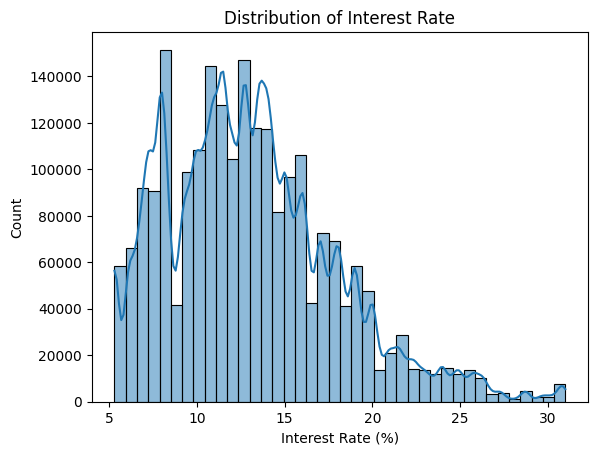

count    2.260668e+06
mean     1.309283e+01
std      4.832138e+00
min      5.310000e+00
25%      9.490000e+00
50%      1.262000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64


In [86]:
sns.histplot(df_cleaned['int_rate'], kde=True, bins=40)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Count')
plt.show()


print(df_cleaned['int_rate'].describe())



In [87]:
df.shape

(1220126, 48)

In [89]:
import pandas as pd
import numpy as np
import d3rlpy
from d3rlpy.dataset import MDPDataset
from d3rlpy.algos import CQLConfig
import matplotlib.pyplot as plt
import os


In [110]:
"""
offline_rl_pipeline.py

End-to-end offline RL pipeline for "approve/deny" loan decisioning.
Algorithm: IQL (Implicit Q-Learning) from d3rlpy.
Evaluation: Estimated policy value computed by applying learned policy
            to held-out applicants and computing rewards using true outcomes.
"""

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch

from d3rlpy.algos import IQL
from d3rlpy.algos import DiscreteCQL, DiscreteCQLConfig
from d3rlpy.metrics import evaluate_on_dataset


from d3rlpy.dataset import MDPDataset

import joblib
from typing import Tuple, List

########################
# 1. Data loading + simple feature selection
########################
def load_and_select(df: pd.DataFrame, sample_frac: float = None) -> pd.DataFrame:
    
    if sample_frac:
        df = df.sample(frac=sample_frac, random_state=42)
    # Basic selected features (example): numeric + a few categoricals.
    # You should adapt feature list based on your EDA.
    selected_cols = [
        'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'emp_length',
        'term', 'home_ownership', 'purpose', 'addr_state',
        'grade', 'sub_grade',
        'loan_status'
    ]
    # keep only columns that exist
    selected = [c for c in selected_cols if c in df.columns]
    df = df[selected].copy()
    return df

########################
# 2. Preprocessing + target mapping + reward engineering
########################
def preprocess_and_rewards(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, ColumnTransformer]:
    # Map loan_status to binary outcome: 0 fully paid, 1 defaulted (charged off)
    def map_loan_status(s):
        s = str(s).lower()
        if 'fully paid' in s or s == 'fully_paid' or s == 'current':
            return 0
        if 'charged off' in s or 'default' in s or 'late' in s:
            return 1
        # conservative fallback: treat ambiguous as paid (0)
        return 0

    df['defaulted'] = df['loan_status'].apply(map_loan_status)

    # Reward function components
    # ensure int_rate is numeric (may contain %)
    if 'int_rate' in df.columns:
        df['int_rate'] = df['int_rate'].astype(str).str.replace('%', '').astype(float) / 100.0

    # Clean emp_length -> convert strings like '10+ years' to numeric
    if 'emp_length' in df.columns:
        df['emp_length'] = df['emp_length'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0.0)

    # Define features (exclude loan_status and defaulted)
    feature_cols = [c for c in df.columns if c not in ('loan_status', 'defaulted')]
    # Separate numeric and categorical for pipeline
    numeric_cols = df[feature_cols].select_dtypes(include=['int64','float64']).columns.tolist()
    categorical_cols = [c for c in feature_cols if c not in numeric_cols]

    # Column transformer
    numeric_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])
    categorical_pipeline = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])
    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ], remainder='drop')

    # Fit-transform features
    X_raw = df[feature_cols]
    X = preprocessor.fit_transform(X_raw)

    # Actions: originally logged decisions are not used because we will train agent from states only.
    # For offline RL dataset we need action, reward, next_observation, terminal.
    # We'll use actions as the logged action if available; if not, we can set action to 1 for approve (since dataset contains only accepted loans).
    # LendingClub accepted_2007_to_2018.csv contains only accepted loans -> logged actions are "approve".
    # To create a richer offline dataset, you'd want also rejected cases or simulate deny actions.
    # Here we will create dataset where logged action = 1 (approve) for all rows.
    actions = np.ones((len(df),), dtype=np.int32)  # 1 = approve, 0 = deny

    # Rewards per spec:
    # If action == Deny: 0
    # If action == Approve and Fully Paid: +(loan_amnt * int_rate)
    # If action == Approve and Defaulted: -loan_amnt
    loan_amnt = df.get('loan_amnt', pd.Series(np.ones(len(df)))).astype(float).values
    int_rate = df.get('int_rate', pd.Series(np.zeros(len(df)))).astype(float).values
    defaults = df['defaulted'].values.astype(int)

    # Reward only depends on action & ground truth outcome:
    rewards = np.where(
        actions == 0,
        0.0,
        np.where(defaults == 0, loan_amnt * int_rate, -loan_amnt)
    ).astype(float)

    # For offline static dataset we can set next_state = same as state and terminal=True for each sample
    # Many offline RL libs accept arrays of observations, actions, rewards, terminals.
    observations = X.astype(np.float32)
    # next_observations can be dummy (set equal to observations)
    next_observations = observations.copy()
    terminals = np.ones((len(observations),), dtype=bool)  # each sample is terminal (independent)

    return observations, actions.reshape(-1, 1), rewards.reshape(-1, 1), terminals, preprocessor

########################
# 3. Train-test split and MDPDataset creation
########################
def create_mdp_datasets(obs, acts, rews, terms, test_size=0.2, random_state=42):
    X_train, X_test, a_train, a_test, r_train, r_test, t_train, t_test = train_test_split(
        obs, acts, rews, terms, test_size=test_size, random_state=random_state, shuffle=True
    )

    # d3rlpy expects arrays of shape (n_steps, obs_dim), (n_steps, action_dim), (n_steps, ), (n_steps, )
    # Convert rewards shape to (n_steps,)
    dataset_train = MDPDataset(X_train, a_train, r_train.reshape(-1), t_train)
    dataset_test = MDPDataset(X_test, a_test, r_test.reshape(-1), t_test)
    return dataset_train, dataset_test, (X_train, X_test, a_train, a_test, r_train, r_test, t_train, t_test)

########################
# 4. Train an offline RL agent (IQL)
########################
def train_iql(dataset_train: MDPDataset, dataset_test: MDPDataset, save_dir: str = './iql_out'):
    os.makedirs(save_dir, exist_ok=True)
    # IQL handles continuous actions normally; we have discrete actions {0,1}. A common approach:
    # - treat action as continuous scalar (0 or 1) and let algorithm learn Q-values.
    # - Alternatively, use discrete RL algorithms adapted to offline data (d3rlpy predominantly supports continuous).
    # IQL can still be used if actions are represented as continuous 1D values.
    config = DiscreteCQLConfig(
        gamma=0.99,
        batch_size=256,
        learning_rate=3e-4,
        conservative_weight=1.0,
    )

    # Initialize algorithm
    algo = DiscreteCQL(
        config=config,
        device="cuda" if torch.cuda.is_available() else "cpu",
        enable_ddp=False,
    )

    # Train
    algo.fit(
        dataset_train,
        n_steps=n_steps,
        logdir=save_dir,
        verbose=True,
    )

    # Offline evaluation using the new API
    policy_value = None
    if dataset_test is not None:
        result = evaluate_on_dataset(algo, dataset_test)
        policy_value = result["average_value_estimation"]
        print(f"Estimated Policy Value: {policy_value:.4f}")

    return algo, policy_value

########################
# 5. Policy evaluation on held-out set (Estimated Policy Value)
########################
def evaluate_policy_on_dataset(algo, X_test: np.ndarray, true_rewards_test: np.ndarray) -> float:
    """
    Apply the learned policy to each test state, compute actions, then compute expected reward
    using ground-truth outcomes in test set (i.e., if policy approves -> reward from data, else 0).
    This yields an estimated policy value under the empirical distribution of test applicants.
    Note: This is a straightforward on-dataset evaluation: E_{s~test}[r(s, pi(s))]
    """
    # d3rlpy policy: algo.predict_action returns continuous actions
    # Use algo.predict to get action values; we'll threshold at 0.5 to map to {0,1}
    # Use algo.predict to get deterministic action
    actions_cont = algo.predict(X_test)  # shape (n, action_dim). For scalar action_dim=1
    if actions_cont.ndim == 2 and actions_cont.shape[1] == 1:
        actions_cont = actions_cont.ravel()
    # Map continuous to discrete: threshold 0.5
    actions_discrete = (actions_cont >= 0.5).astype(int)

    # true_rewards_test is reward if action==approve (1); if policy denies action=0 -> reward=0
    r_if_approve = true_rewards_test.reshape(-1)  # rewards computed earlier reflect approve-case (or 0 if action was set 0)
    # but in our dataset rewards already assume action==approve, and we created actions logged=1
    # So when policy denies (0) => reward 0; when approves (1) => r_if_approve
    est_rewards = np.where(actions_discrete == 1, r_if_approve, 0.0)
    policy_value = est_rewards.mean()
    return float(policy_value), actions_discrete

########################
# 6. Example main
########################
def main(csv_path: str, sample_frac: float = 0.05, test_size: float = 0.2, n_epochs: int = 80):
    print("Loading data...")
    df = load_and_select(csv_path, sample_frac=sample_frac)
    print(f"Selected {len(df)} rows")

    print("Preprocessing and computing rewards...")
    obs, acts, rews, terms, preprocessor = preprocess_and_rewards(df)

    print("Creating MDP Datasets and splitting...")
    dataset_train, dataset_test, splits = create_mdp_datasets(obs, acts, rews, terms, test_size=test_size)
    X_train, X_test, a_train, a_test, r_train, r_test, t_train, t_test = splits

    print("Training IQL (offline RL)...")
    algo = train_iql(dataset_train, dataset_test)

    print("Evaluating learned policy on held-out test set...")
    policy_value, actions_discrete = evaluate_policy_on_dataset(algo, X_test, r_test)
    print(f"Estimated policy value (avg reward per applicant): {policy_value:.4f}")

    # Save preprocessor & summary
    joblib.dump(preprocessor, "preprocessor.joblib")
    print("Done. Preprocessor saved to preprocessor.joblib")

    # Example: return policy value and trained algo
    return algo, policy_value, (X_test, r_test, actions_discrete)


if __name__ == "__main__":
    # Set CSV path to your accepted_2007_to_2018.csv file
    
    # Use small sample_frac for quick iteration, but train final with a larger portion (or None).
    trained_algo, pv, _ = main(df_cleaned, sample_frac=0.05, test_size=0.2)
    print("Estimated policy value:", pv)


ImportError: cannot import name 'evaluate_on_dataset' from 'd3rlpy.metrics' (/usr/local/lib/python3.11/dist-packages/d3rlpy/metrics/__init__.py)